<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/07_Unpaired_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# Example

In [12]:
# Here are two independent samples.

sample1 = [ 3.74339687,  3.37456983,  3.22622504,  3.85360595,  3.83070471,
        3.22184653,  3.32714127,  3.23057107,  2.56260439,  3.64864081,
        3.12198407,  3.33075965,  3.99188918,  3.04224009,  3.88579632,
        2.73908669,  3.36890061,  3.50628879,  3.15412542,  2.72540109,
        3.81372483,  3.3415192 ,  3.35567834,  3.09265056,  3.69706704,
        3.73405978,  3.95644172,  3.20593825,  2.80396487,  3.41423476]

sample2 = [3.40264017, 3.9686492 , 3.64783273, 2.58794221, 3.88915031,
       3.32453254, 3.38390787, 3.30757769, 3.24202768, 3.25168926,
       3.20229674, 3.5605752 , 3.18762347, 3.54824798, 3.60634902,
       2.79630925, 3.62130994, 3.74178157, 3.3622675 , 3.751688  ,
       3.66202326, 3.12759647, 3.44223548, 3.49414514, 3.22058186]

# Calculate the statistics of the samples
sample1_mean = np.mean(sample1)
sample1_std = np.std(sample1, ddof = 1 )
print("Sample 1: ")
print(" Mean: {}".format(sample1_mean))
print(" Standard Deviation (Unbiased): {}".format(sample1_std))  

sample2_mean = np.mean(sample2)
sample2_std = np.std(sample2, ddof = 1 )
print("\nSample 2: ")
print(" Mean: {}".format(sample2_mean))
print(" Standard Deviation (Unbiased): {}".format(sample2_std))  

# Let's check the significance of the difference by the two-sample unpaired t-test.

Sample 1: 
 Mean: 3.3767019243333327
 Standard Deviation (Unbiased): 0.38449167246272675

Sample 2: 
 Mean: 3.4132392216
 Standard Deviation (Unbiased): 0.31332457088808335


# Step 1. Define null and alternative hypotheses

In [13]:
# H0 : mu_sample1 = mu_sample2
print("H0: The two samples are from the same population.")

# H1 : mu_sample1 != mu_sample2 
print("H1: The two samples are significantly different.")

H0: The two samples are from the same population.
H1: The two samples are significantly different.


# Step 2. Calculate a test statistic

In [14]:
# t = sample_error / std_error

# Sample error = (SampleMean1 - SampleMean2) - (mu1 - mu2)
sample_error = sample1_mean - sample2_mean - 0

# Standard error of the mean difference
df1 = len(sample1)-1
df2 = len(sample2)-1
pooled_variance = (sample1_std**2*df1 + sample2_std**2*df2) / (df1 + df2)
standard_error = np.sqrt(pooled_variance/len(sample1) + pooled_variance/len(sample2))

t = sample_error / standard_error

print("Test statistic t: {}".format(t))

Test statistic t: -0.38109317510821544


# Step 3. Check how likely the test statistic can be obtained.

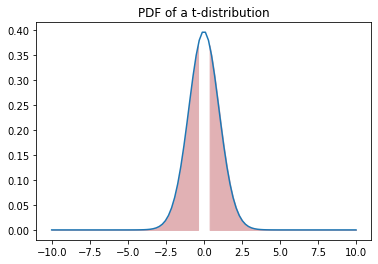

In [15]:
# The t-statistic follows t-distribution.
# The t-distribution is described by DF of a sample.
t_dist = stats.t(df = df1 + df2 ) 
x = np.linspace(-10, 10, 100)  
y = t_dist.pdf(x)      
plt.plot(x, y)  
plt.title("PDF of a t-distribution") 

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(abs(t), x[-1], 50) 
left_interval = np.linspace(-x[-1], -abs(t), 50) 
plt.fill_between( right_interval, t_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)
plt.fill_between( left_interval, t_dist.pdf(left_interval) , color='#e1b1b4', alpha=1)

In [16]:
# Calculate the p-value.
p, _ = integrate.quad(t_dist.pdf, left_interval[0], left_interval[-1]) #  Arg: function, from_value, to_value 
p *= 2 # two-tailed

print("The p-value for this test: {}".format(p))

The p-value for this test: 0.7046575222738513


In [17]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: The population mean is not equal to 4.5.")
else:
  print("Accept H0: The population mean is 4.5.")

Accept H0: The population mean is 4.5.


##### [Additional] You can calculate the p-value by the SF. 

In [18]:
p = t_dist.sf( abs(t) ) * 2
print("p-value : {0}".format(p))

p-value : 0.7046575222739384


##### [Additional] You can use critical values.

In [19]:
cv = t_dist.ppf(.975)
print("Critical values (alpha = 0.05): -{0}, {0}".format(cv))

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical values (alpha = 0.05): -2.0057459935369497, 2.0057459935369497


### Or you can use codes in the 'stats' module.


In [20]:
t_, p_ = stats.ttest_ind(sample1, sample2)
print("Test statistic t: {}".format(t_))
print("p-value: {}".format(p_))

Test statistic t: -0.38109317510821544
p-value: 0.7046575222739384


# (Step 4) Calculate the effect size

In [21]:
# The effect size for two-sample t-test is cohen's d.
# d = | sample_diff_mean - 0 | / pooled_std

d = abs(sample1_mean - sample2_mean) / np.sqrt(pooled_variance)

print("Effect size: {}".format(d))

Effect size: 0.10320051967745997
